# MAG中收录的期刊的基本特征

In [62]:
import pickle as pk
from collections import Counter
# plot 同时中英混排
import matplotlib.pyplot as plt
from matplotlib import font_manager
plt.style.use('seaborn')
plt.figure(figsize=(4,3), dpi=300)
# 字体加载
font_path = "../font/tnw+simsun.ttf"
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
# 字体设置
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()  # 根据名称设置字体
plt.rcParams['font.size'] = 14 # 设置字体大小
plt.rcParams['axes.unicode_minus'] = False # 使坐标轴刻度标签正常显示正负号

<Figure size 1200x900 with 0 Axes>

In [2]:
# # journal_cate key: mag journal id. values: a dictionary containing the metadata of the journals. e.g. jcrCate, jcrName, JCI, JIF
journal_cate = pk.load(open('../DataCrossBoundaryPerspective_InterdisciplinaryResearch/journal_cate.pkl','rb'))

In [4]:
# 检查基本数据, count 是输出字典的前count个
count = 3
for k,v in journal_cate.items():
    print(v['jcrCate'].split('$'))
    count -= 1
    if count == 0:
        break

['DEMOGRAPHY - SSCI', 'SOCIAL SCIENCES, MATHEMATICAL METHODS - SSCI']
['MINERALOGY - SCIE']
['ONCOLOGY - SCIE', 'RADIOLOGY, NUCLEAR MEDICINE & MEDICAL IMAGING - SCIE']


In [ ]:
# check 一下, 学科名是否都规范.
for k,v in journal_cate.items():
    print(v['jcrCate'].split('$'))
    count -= 1
    if count == 0:
        break

共有1万3千本期刊, 数量上看单学科期刊有多少本.多学科期刊有多少本

还需要看期刊分类粒度.

In [40]:
# 期刊数量分布
numJournalCateCounter = Counter()
for k,v in journal_cate.items():
    numJournalCateCounter[len(v['jcrCate'].split('$'))] += 1
print(numJournalCateCounter)
numFields , frequency = zip(*numJournalCateCounter.items())
print(numFields, frequency)

Counter({1: 8418, 2: 4007, 3: 1067, 4: 238, 5: 26, 6: 6})
(2, 1, 3, 4, 5, 6) (4007, 8418, 1067, 238, 26, 6)


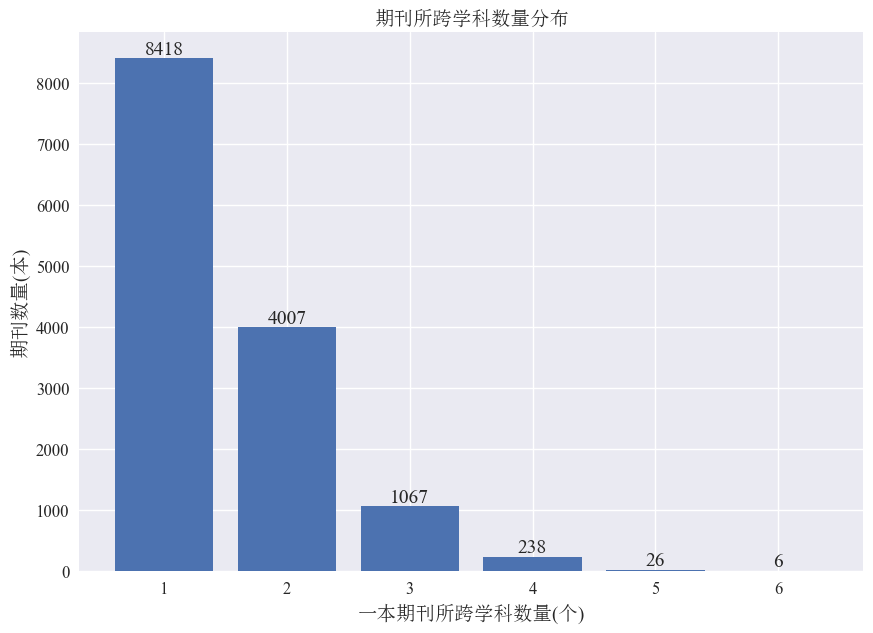

In [65]:
fig, ax = plt.subplots()
bars = ax.bar(numFields, frequency)
ax.bar_label(bars)
ax.set_ylabel('期刊数量(本)', font=prop.get_name())
ax.set_xlabel('一本期刊所跨学科数量(个)', font=prop.get_name())
ax.set_title('期刊所跨学科数量分布', font=prop.get_name())
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

跨不同学科的情况,下面看跨不同检索大类的情况.

In [ ]:
# 输出这个跨了几个Index,1-3皆有可能.
def index_count(list):
    

In [ ]:
# 从SSCI, SCIE, AHCI期刊数量分布
numJournalIndexCounter = Counter()
for k,v in journal_cate.items():
    numJournalCateCounter[index_count(v['jcrCate'].split('$'))] += 1
print(numJournalCateCounter)
numFields , frequency = zip(*numJournalCateCounter.items())
print(numFields, frequency)